## NAME : Mustafa Azırak
### ReadME infos about homework : 

### House Price Prediction

This project focuses on predicting the price of Airbnb listings based on various features such as host response rate, property type, room type, number of reviews, and more. The goal is to develop accurate machine learning and deep learning models that can effectively predict the price of Airbnb listings, thereby assisting both hosts and guests in making informed decisions.

#### Dataset

The dataset used in this project is sourced from Airbnb listings and includes information about properties in various locations. It contains features such as host response rate, property type, room type, number of reviews, review scores, and price.

#### Project Workflow

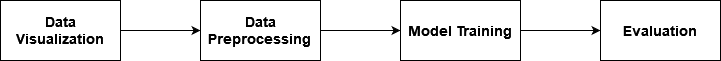
<br>
1. Data Visualization and Exploration: the Airbnb data should be visualized to understand how different features, like property type, number of bedrooms, and host response rate, influence listing prices. This involves techniques like data visualization to uncover patterns and relationships. The project begins with exploratory data analysis (EDA) to gain insights into the Airbnb dataset. This includes visualizing the distribution of features, identifying correlations between variables, and understanding the structure of the data.<br>
<br>
2. Cleaning Data: Real-world data often contains inconsistencies or missing values. This phase focuses on cleaning the data to ensure its accuracy and reliability for our models. In this phase, the dataset is cleaned to handle missing values, outliers, and inconsistencies. Data cleaning ensures the dataset is accurate and reliable for subsequent analysis.<br>
<br>
3. Data Encoding: Categorical data, like property type (apartment, house, etc.), needs to be transformed into a format that machine learning models can understand. This might involve converting text labels into numerical representations. Categorical variables are encoded into numerical representations using techniques such as one-hot encoding. This step is crucial for machine learning algorithms to process categorical data effectively.<br>
<br>
4. Data Scaling: Different features can have varying scales (e.g., number of bedrooms vs. host response rate). I normalize the data to ensure all features contribute equally during model training. Normalization techniques are applied to scale the features to a similar numerical range, typically between 0 and 1. Scaling ensures that no single feature dominates others in terms of magnitude, facilitating more efficient model training.<br>
<br>
5. Feature Selection: Not all features in the data are equally important for price prediction. I employ various techniques to identify the most impactful features that significantly influence listing prices. Various feature selection algorithms are employed to identify the most relevant and informative features for predicting Airbnb prices. Techniques such as SelectKBest, Recursive Feature Elimination (RFE), and Mutual Information are utilized to select the optimal feature subset.<br>
<br>                
6. Model Training and Evaluation: I train various machine learning and deep learning models on the preprocessed data. These models will learn to predict listing prices based on the provided features. Then I evaluate their performance to determine the most accurate model. A range of algorithms including Linear Regression, Random Forest, Gradient Boosting, and deep learning architectures such as Multilayer Perceptron (MLP) and Long Short-Term Memory (LSTM) networks are evaluated. Model performance is assessed using metrics such as Mean Squared Error (MSE) on validation and test sets.<br>

#### Results

The project concludes with the selection of the best-performing model for predicting Airbnb prices. The selected model is based on the lowest MSE achieved on the test set. Additionally, insights are provided into the most important features contributing to price prediction, obtained through feature selection techniques.

#### Dependencies

- Python 3
- Pandas
- Matplotlib
- Seaborn
- Scikit-learn
- Keras (for deep learning models)

### Model Selection Reasons

#### ML Models

1. Linear Regression, Ridge Regression, Lasso Regression, Elastic Net:
- Suitability: These models are chosen because they provide a simple and interpretable way to understand the linear relationships between your input features (like host response rate, property type, room type, number of reviews) and the target variable (price of Airbnb listings).
- Interpretability: Linear regression models allow you to directly interpret the coefficients of each feature, which can be valuable in understanding the impact of different features on the price.
- Baseline Performance: Linear regression models serve as a baseline performance measure against which the performance of more complex models can be compared.

2. Decision Tree, Random Forest:
- Non-linearity: Decision tree-based models are chosen to capture non-linear relationships between features and the target variable. This is important because relationships in your dataset might not be linear.
- Robustness to Outliers: Decision trees and Random Forests are robust to outliers and can handle heterogeneous data well.
- Feature Importance: These models provide insights into feature importance, helping you identify which features have the most significant impact on predicting Airbnb listing prices.

3. Gradient Boosting, AdaBoost:
- Performance Improvement: Ensemble methods like Gradient Boosting and AdaBoost are chosen to improve prediction accuracy further. They sequentially train multiple weak learners, focusing on the instances that were poorly predicted by the previous models.
- Robustness: These models are robust against overfitting and noise in the data, making them suitable for datasets with complex relationships.
- Handling Non-linear Relationships: Both Gradient Boosting and AdaBoost can capture non-linear relationships in the data effectively, enhancing the prediction performance.

4. Support Vector Machine (SVR):
- Handling High-dimensional Data: SVR is effective in handling high-dimensional data, which is often the case in datasets with many features, such as the Airbnb dataset with various listing attributes.
- Flexibility in Kernel Choice: SVR allows for flexibility in choosing different kernel functions to capture non-linear relationships between features and target variable, which might exist in your dataset.

5. K-Nearest Neighbors (KNN):
- Local Patterns: KNN is chosen to capture local patterns in the data. In the context of Airbnb listings, there might be clusters of listings with similar characteristics in certain neighborhoods or areas, and KNN can capture such locality-based patterns effectively.
- Simple Implementation: KNN is straightforward to implement and can serve as a simple yet effective baseline model.

#### DL Models

Multi-Layer Perceptron (MLP), Deep Model, Wide & Deep Model, Simple RNN, LSTM:
- Complexity of Relationships: Deep learning models are capable of capturing highly complex non-linear relationships between features and the target variable. In datasets like Airbnb listings, where the relationships might be intricate and non-linear, deep learning models can offer superior predictive performance.
- Feature Representation: Deep learning models can automatically learn hierarchical representations of the input features, potentially capturing hidden patterns and interactions that may not be apparent in the raw data.
- Generalization: Deep learning models can generalize well to unseen data when trained on a sufficiently large and diverse dataset, making them suitable for predicting Airbnb listing prices across different regions and property types.

###### Further details about the parts are given on every code block section.

# 1. Data Visualization and Exploring

#### I start by loading the data from a CSV file. Then, I create a correlation matrix to quantify how features in my dataset relate to each other. To make these relationships easier to see, I generate a heatmap that highlights strong positive or negative correlations. Finally, I use a pairplot to visualize all feature pairs simultaneously, which can reveal non-linear relationships and underlying patterns. This exploration helps me understand the structure of my data and guides me in selecting features for my machine learning model.

##### importing the necessary library

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

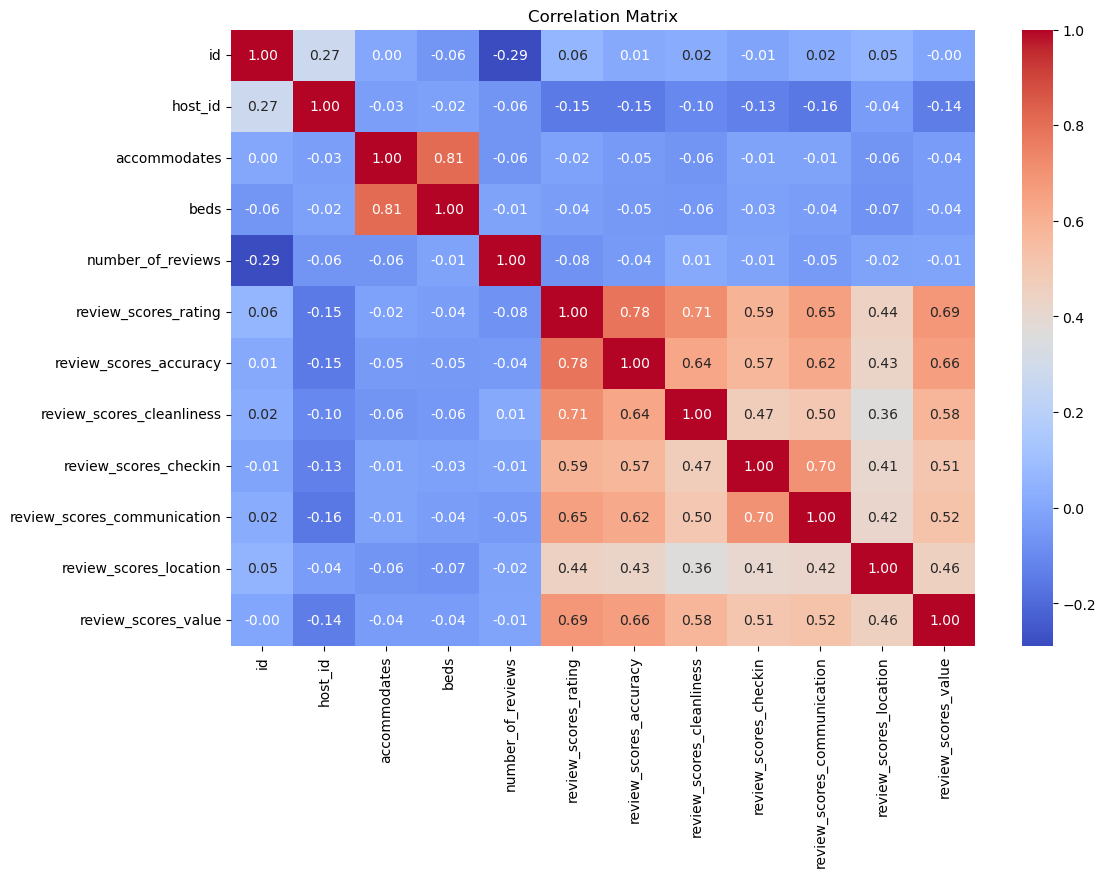

In [2]:
df = pd.read_csv("data.csv")
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Matrix')
plt.show()

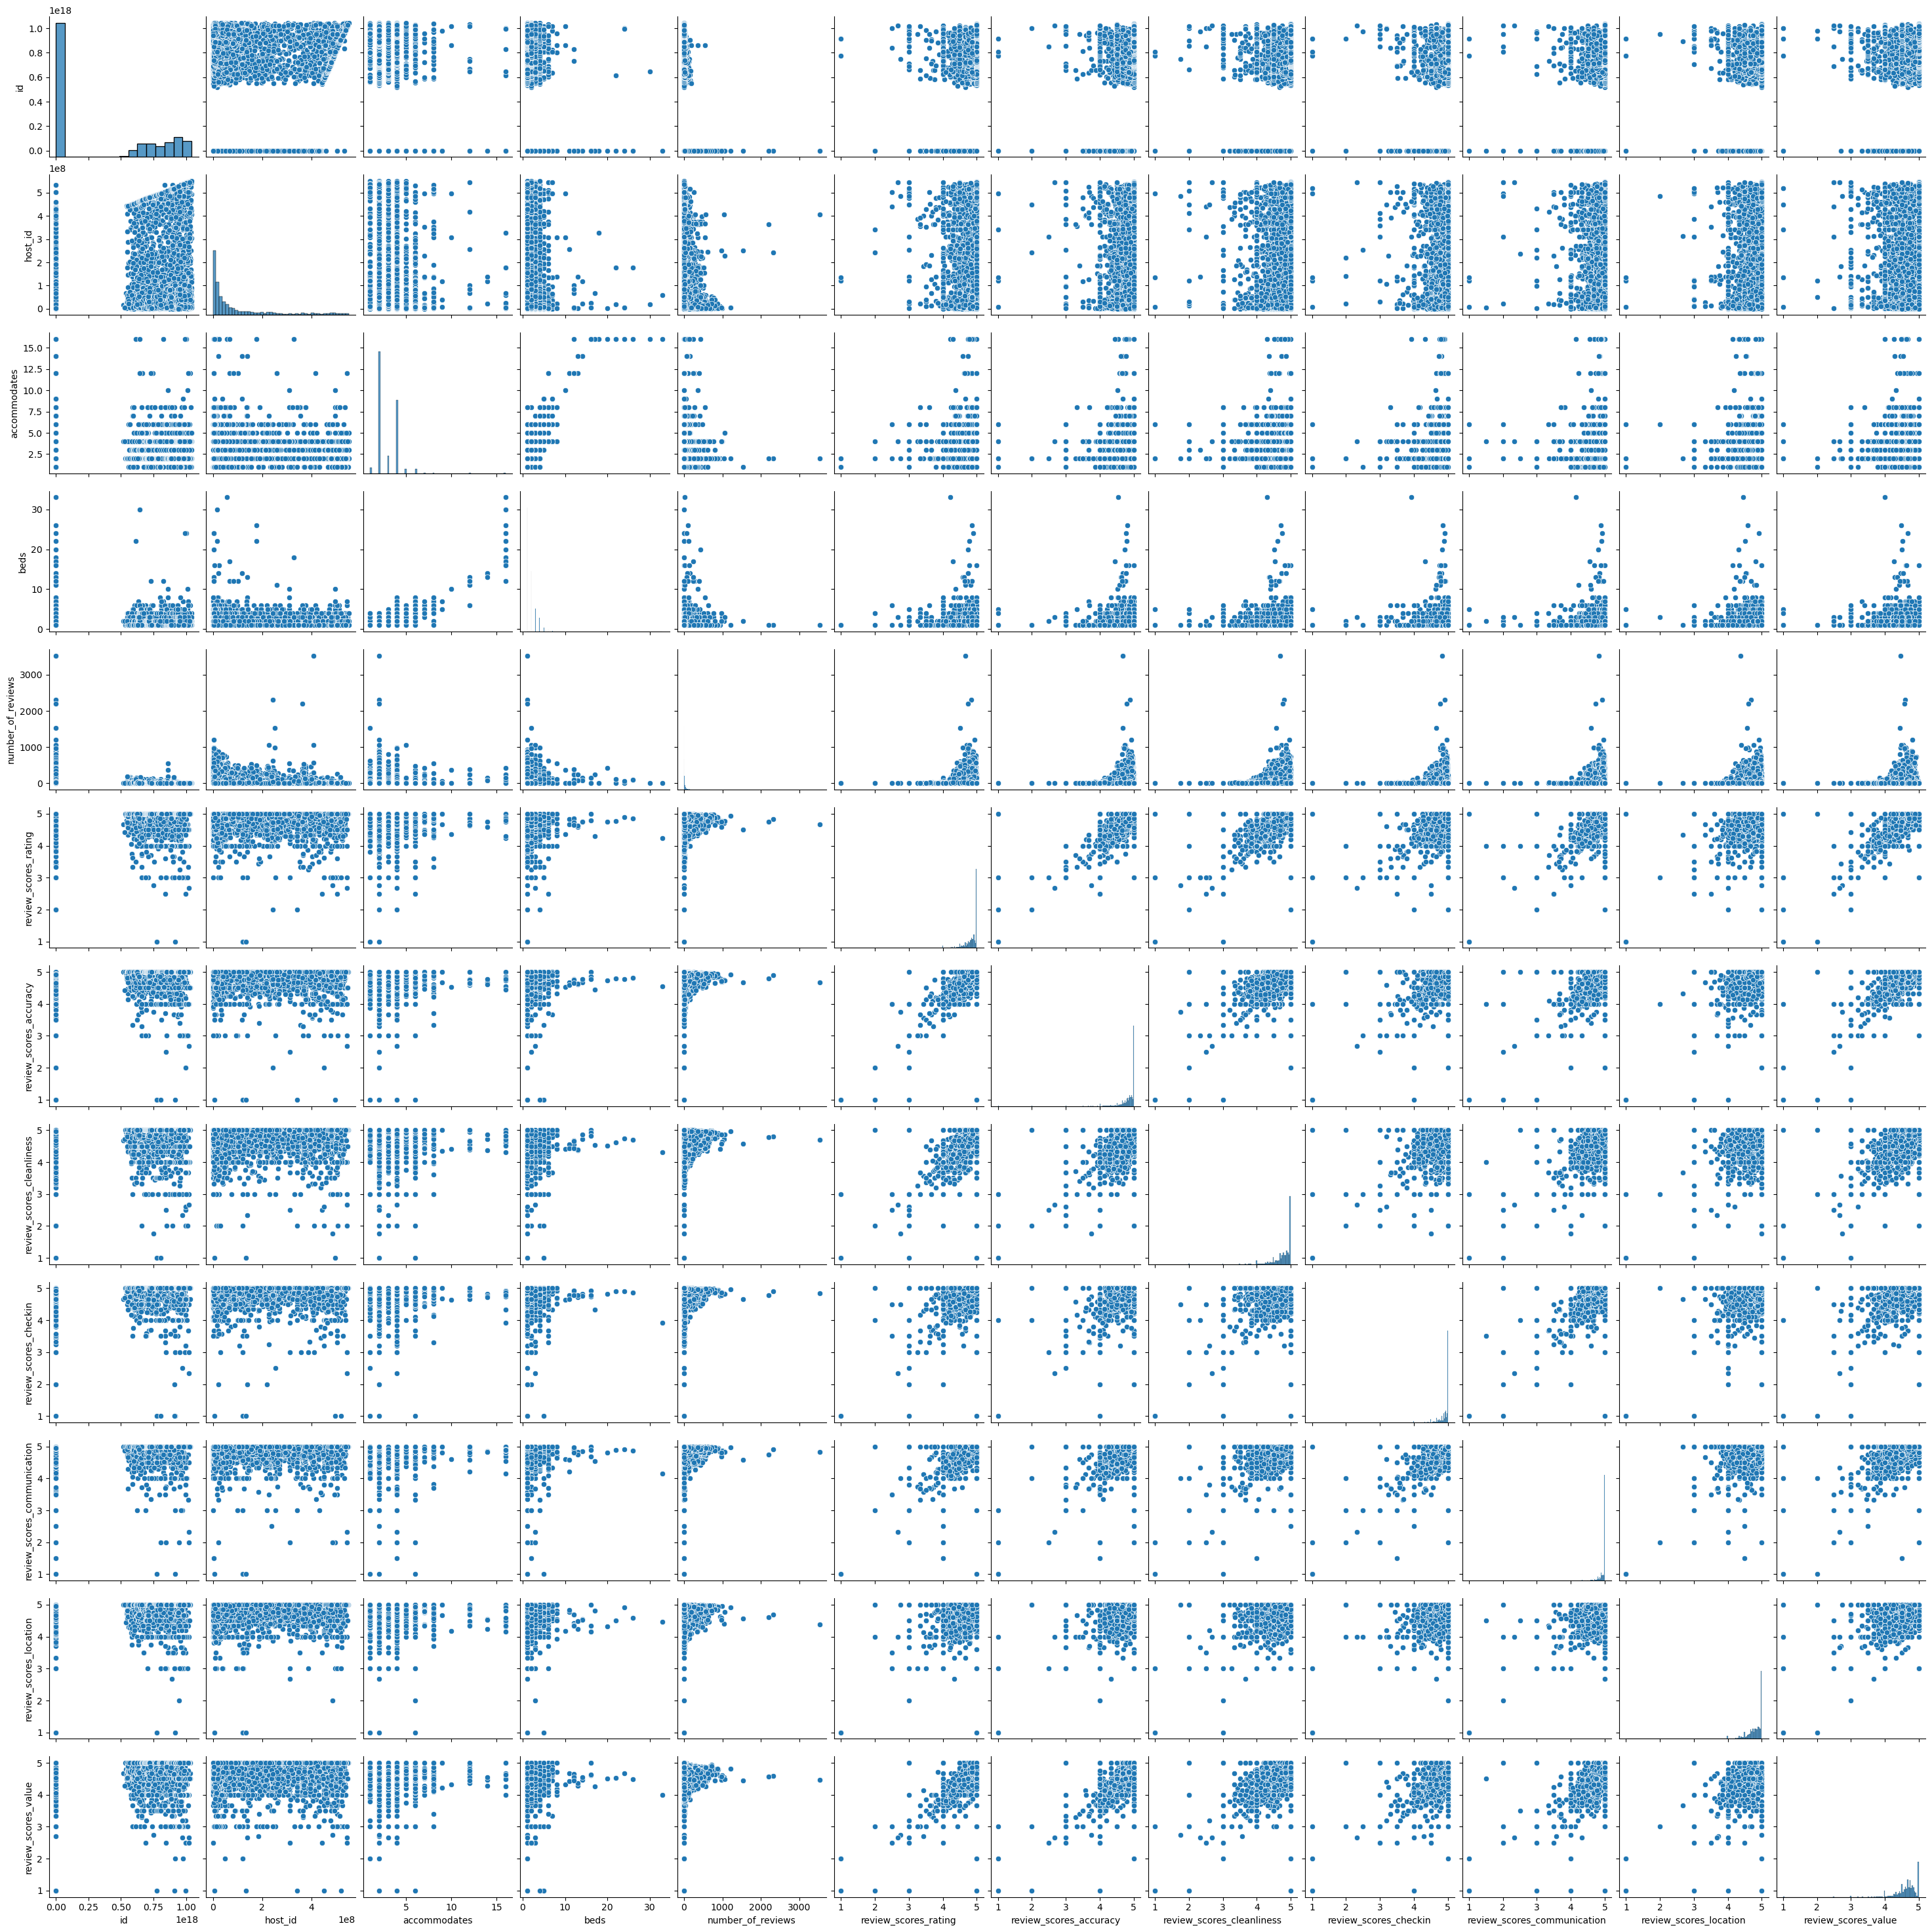

In [3]:
sns.pairplot(df)
plt.show()

# 2. Data Prepocessing

### 2.1 Cleaning Data
##### I print the all fatures in the data set

In [4]:
df.columns

Index(['id', 'host_id', 'host_name', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_verifications',
       'neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'beds', 'price', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value'],
      dtype='object')

##### I eliminate some features manually based on the "Data Visualization and Exploring" section to improve the preformance of the models.

In [5]:
df_main = df[["host_response_rate", "host_acceptance_rate", "property_type", "room_type", "accommodates",
       "bathrooms_text", "beds", "price", "number_of_reviews",
       "review_scores_rating", "review_scores_accuracy",
       "review_scores_cleanliness", "review_scores_checkin",
       "review_scores_communication", "review_scores_location",
       "review_scores_value"]]
df_main

,host_response_rate,host_acceptance_rate,property_type,room_type,accommodates,bathrooms_text,beds,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,NaN,86%,Entire condo,Entire home/apt,2,1 bath,1.0,$232.00,5,4.60,4.60,4.40,4.40,4.60,4.60,4.40
1,NaN,50%,Entire home,Entire home/apt,4,2 baths,2.0,$120.00,6,5.00,4.67,4.83,4.83,5.00,4.67,4.83
2,100%,83%,Entire rental unit,Entire home/apt,4,1 bath,2.0,$170.00,51,4.71,4.80,4.65,4.87,4.96,4.57,4.57
3,70%,18%,Entire rental unit,Entire home/apt,2,1.5 baths,NaN,$200.00,43,4.86,4.95,4.93,4.95,4.98,5.00,4.84
4,0%,60%,Entire home,Entire home/apt,3,1.5 baths,2.0,$265.00,5,5.00,5.00,5.00,5.00,5.00,5.00,4.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8734,100%,86%,Entire rental unit,Entire home/apt,4,1.5 baths,2.0,$500.00,7,5.00,5.00,5.00,5.00,5.00,5.00,4.88
8735,90%,81%,Houseboat,Entire home/apt,4,1.5 baths,2.0,$400.00,7,4.88,5.00,4.88,5.00,5.00,4.88,3.88
8736,78%,100%,Entire rental unit,Entire home/apt,5,1 bath,2.0,$270.00,2,5.00,5.00,5.00,4.67,4.67,4.33,4.33
8737,100%,82%,Entire rental unit,Entire home/apt,2,1 bath,1.0,$275.00,6,4.86,5.00,5.00,5.00,5.00,5.00,4.86


##### I clean the missing data from the data set

In [6]:
df_main = df_main.dropna()

### 2.2 Encoding Data

##### I perform one-hot encoding for "property_type" and "room_type", because it is a common technique for handling categorical data. By converting categorical variables into numerical representations, machine learning algorithms can understand and process the data more effectively.

In [7]:
df_main["property_type"].unique()

array(['Entire rental unit', 'Entire home', 'Entire condo',
       'Private room in guesthouse', 'Private room in bed and breakfast',
       'Room in boutique hotel', 'Private room in loft', 'Room in hotel',
       'Private room in home', 'Private room in boat',
       'Private room in rental unit', 'Room in aparthotel',
       'Private room in condo', 'Private room in townhouse', 'Boat',
       'Entire guest suite', 'Private room in houseboat',
       'Entire serviced apartment', 'Houseboat', 'Entire townhouse',
       'Private room in casa particular', 'Private room in guest suite',
       'Shared room in condo', 'Shared room in hostel',
       'Entire guesthouse', 'Entire place', 'Entire vacation home',
       'Entire loft', 'Private room in hostel',
       'Room in bed and breakfast', 'Room in hostel',
       'Private room in villa', 'Private room', 'Shared room in home',
       'Private room in tiny home', 'Private room in serviced apartment',
       'Tiny home', 'Entire cottage',

In [8]:
dummies = pd.get_dummies(df_main.property_type)
df_main = pd.concat([df_main, dummies], axis="columns")
df_main = df_main.drop(["property_type", "Entire chalet"], axis="columns")
df_main

,host_response_rate,host_acceptance_rate,room_type,accommodates,bathrooms_text,beds,price,number_of_reviews,review_scores_rating,review_scores_accuracy,...,Room in serviced apartment,Shared room in condo,Shared room in home,Shared room in hostel,Shared room in hotel,Shared room in houseboat,Shared room in rental unit,Tent,Tiny home,Tower
2,100%,83%,Entire home/apt,4,1 bath,2.0,$170.00,51,4.71,4.80,...,0,0,0,0,0,0,0,0,0,0
4,0%,60%,Entire home/apt,3,1.5 baths,2.0,$265.00,5,5.00,5.00,...,0,0,0,0,0,0,0,0,0,0
8,100%,73%,Entire home/apt,4,1.5 baths,2.0,$296.00,12,4.92,5.00,...,0,0,0,0,0,0,0,0,0,0
21,70%,10%,Entire home/apt,2,1.5 baths,1.0,$200.00,0,5.00,5.00,...,0,0,0,0,0,0,0,0,0,0
22,100%,90%,Entire home/apt,2,1.5 baths,2.0,$260.00,9,5.00,4.78,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8734,100%,86%,Entire home/apt,4,1.5 baths,2.0,$500.00,7,5.00,5.00,...,0,0,0,0,0,0,0,0,0,0
8735,90%,81%,Entire home/apt,4,1.5 baths,2.0,$400.00,7,4.88,5.00,...,0,0,0,0,0,0,0,0,0,0
8736,78%,100%,Entire home/apt,5,1 bath,2.0,$270.00,2,5.00,5.00,...,0,0,0,0,0,0,0,0,0,0
8737,100%,82%,Entire home/apt,2,1 bath,1.0,$275.00,6,4.86,5.00,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df_main["room_type"].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [10]:
dummies = pd.get_dummies(df_main.room_type)
df_main = pd.concat([df_main, dummies], axis="columns")
df_main = df_main.drop(["room_type", "Shared room"], axis="columns")
df_main

,host_response_rate,host_acceptance_rate,accommodates,bathrooms_text,beds,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,...,Shared room in hostel,Shared room in hotel,Shared room in houseboat,Shared room in rental unit,Tent,Tiny home,Tower,Entire home/apt,Hotel room,Private room
2,100%,83%,4,1 bath,2.0,$170.00,51,4.71,4.80,4.65,...,0,0,0,0,0,0,0,1,0,0
4,0%,60%,3,1.5 baths,2.0,$265.00,5,5.00,5.00,5.00,...,0,0,0,0,0,0,0,1,0,0
8,100%,73%,4,1.5 baths,2.0,$296.00,12,4.92,5.00,5.00,...,0,0,0,0,0,0,0,1,0,0
21,70%,10%,2,1.5 baths,1.0,$200.00,0,5.00,5.00,5.00,...,0,0,0,0,0,0,0,1,0,0
22,100%,90%,2,1.5 baths,2.0,$260.00,9,5.00,4.78,4.89,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8734,100%,86%,4,1.5 baths,2.0,$500.00,7,5.00,5.00,5.00,...,0,0,0,0,0,0,0,1,0,0
8735,90%,81%,4,1.5 baths,2.0,$400.00,7,4.88,5.00,4.88,...,0,0,0,0,0,0,0,1,0,0
8736,78%,100%,5,1 bath,2.0,$270.00,2,5.00,5.00,5.00,...,0,0,0,0,0,0,0,1,0,0
8737,100%,82%,2,1 bath,1.0,$275.00,6,4.86,5.00,5.00,...,0,0,0,0,0,0,0,1,0,0


##### I convert "bathrooms_text" data into numerical values by using simple conversion algorithm to make it understandable by machine learning algorithm.

In [11]:
df_main["bathrooms_text"].unique()

array(['1 bath', '1.5 baths', '1 shared bath', '1 private bath',
       '2 baths', '2.5 baths', '1.5 shared baths', 'Private half-bath',
       'Half-bath', '3.5 baths', '3 baths', 'Shared half-bath', '0 baths',
       '4.5 baths', '0 shared baths', '2 shared baths', '5 baths',
       '2.5 shared baths', '4 baths', '3 shared baths', '5.5 baths'],
      dtype=object)

In [12]:
def extract_bathrooms(text):
  try:
    return float(text.split()[0])
  except:
    return 0

df_main['bathrooms_num'] = df_main['bathrooms_text'].apply(extract_bathrooms)
df_main.loc[df_main['bathrooms_text'].str.contains('shared|half'), 'bathrooms_num'] = 0.5
df_main['bathrooms_num'] = df_main['bathrooms_num'].astype(float)
df_main = df_main.drop('bathrooms_text', axis=1)
df_main

,host_response_rate,host_acceptance_rate,accommodates,beds,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,...,Shared room in hotel,Shared room in houseboat,Shared room in rental unit,Tent,Tiny home,Tower,Entire home/apt,Hotel room,Private room,bathrooms_num
2,100%,83%,4,2.0,$170.00,51,4.71,4.80,4.65,4.87,...,0,0,0,0,0,0,1,0,0,1.0
4,0%,60%,3,2.0,$265.00,5,5.00,5.00,5.00,5.00,...,0,0,0,0,0,0,1,0,0,1.5
8,100%,73%,4,2.0,$296.00,12,4.92,5.00,5.00,5.00,...,0,0,0,0,0,0,1,0,0,1.5
21,70%,10%,2,1.0,$200.00,0,5.00,5.00,5.00,5.00,...,0,0,0,0,0,0,1,0,0,1.5
22,100%,90%,2,2.0,$260.00,9,5.00,4.78,4.89,5.00,...,0,0,0,0,0,0,1,0,0,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8734,100%,86%,4,2.0,$500.00,7,5.00,5.00,5.00,5.00,...,0,0,0,0,0,0,1,0,0,1.5
8735,90%,81%,4,2.0,$400.00,7,4.88,5.00,4.88,5.00,...,0,0,0,0,0,0,1,0,0,1.5
8736,78%,100%,5,2.0,$270.00,2,5.00,5.00,5.00,4.67,...,0,0,0,0,0,0,1,0,0,1.0
8737,100%,82%,2,1.0,$275.00,6,4.86,5.00,5.00,5.00,...,0,0,0,0,0,0,1,0,0,1.0


In [13]:
pd.value_counts(df_main["bathrooms_num"])

1.0    2793
1.5    1308
0.5     438
2.0     274
2.5      93
3.0      54
3.5      29
0.0      21
4.5       5
4.0       5
5.0       4
5.5       2
Name: bathrooms_num, dtype: int64

##### I remove unwanted "$" symbol from the "price" data.

In [14]:
df_main["price"] = df_main["price"].apply(lambda text: float(str(text).replace("$","").replace(",","").strip()))
df_main

,host_response_rate,host_acceptance_rate,accommodates,beds,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,...,Shared room in hotel,Shared room in houseboat,Shared room in rental unit,Tent,Tiny home,Tower,Entire home/apt,Hotel room,Private room,bathrooms_num
2,100%,83%,4,2.0,170.0,51,4.71,4.80,4.65,4.87,...,0,0,0,0,0,0,1,0,0,1.0
4,0%,60%,3,2.0,265.0,5,5.00,5.00,5.00,5.00,...,0,0,0,0,0,0,1,0,0,1.5
8,100%,73%,4,2.0,296.0,12,4.92,5.00,5.00,5.00,...,0,0,0,0,0,0,1,0,0,1.5
21,70%,10%,2,1.0,200.0,0,5.00,5.00,5.00,5.00,...,0,0,0,0,0,0,1,0,0,1.5
22,100%,90%,2,2.0,260.0,9,5.00,4.78,4.89,5.00,...,0,0,0,0,0,0,1,0,0,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8734,100%,86%,4,2.0,500.0,7,5.00,5.00,5.00,5.00,...,0,0,0,0,0,0,1,0,0,1.5
8735,90%,81%,4,2.0,400.0,7,4.88,5.00,4.88,5.00,...,0,0,0,0,0,0,1,0,0,1.5
8736,78%,100%,5,2.0,270.0,2,5.00,5.00,5.00,4.67,...,0,0,0,0,0,0,1,0,0,1.0
8737,100%,82%,2,1.0,275.0,6,4.86,5.00,5.00,5.00,...,0,0,0,0,0,0,1,0,0,1.0


##### I remove unwanted "%" symbol from the "host_response_rate" and "host_acceptance_rate" datas.

In [15]:
df_main["host_response_rate"] = df_main["host_response_rate"].apply(lambda text: float(str(text).replace("%","").replace(",","").strip()))
df_main["host_acceptance_rate"] = df_main["host_acceptance_rate"].apply(lambda text: float(str(text).replace("%","").replace(",","").strip()))
col_list = df_main.columns
df_main

,host_response_rate,host_acceptance_rate,accommodates,beds,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,...,Shared room in hotel,Shared room in houseboat,Shared room in rental unit,Tent,Tiny home,Tower,Entire home/apt,Hotel room,Private room,bathrooms_num
2,100.0,83.0,4,2.0,170.0,51,4.71,4.80,4.65,4.87,...,0,0,0,0,0,0,1,0,0,1.0
4,0.0,60.0,3,2.0,265.0,5,5.00,5.00,5.00,5.00,...,0,0,0,0,0,0,1,0,0,1.5
8,100.0,73.0,4,2.0,296.0,12,4.92,5.00,5.00,5.00,...,0,0,0,0,0,0,1,0,0,1.5
21,70.0,10.0,2,1.0,200.0,0,5.00,5.00,5.00,5.00,...,0,0,0,0,0,0,1,0,0,1.5
22,100.0,90.0,2,2.0,260.0,9,5.00,4.78,4.89,5.00,...,0,0,0,0,0,0,1,0,0,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8734,100.0,86.0,4,2.0,500.0,7,5.00,5.00,5.00,5.00,...,0,0,0,0,0,0,1,0,0,1.5
8735,90.0,81.0,4,2.0,400.0,7,4.88,5.00,4.88,5.00,...,0,0,0,0,0,0,1,0,0,1.5
8736,78.0,100.0,5,2.0,270.0,2,5.00,5.00,5.00,4.67,...,0,0,0,0,0,0,1,0,0,1.0
8737,100.0,82.0,2,1.0,275.0,6,4.86,5.00,5.00,5.00,...,0,0,0,0,0,0,1,0,0,1.0


### 2.3 Data Scaling

##### I do normalization on data to bring all features into a similar numerical range, typically between 0 and 1. This ensures that no single feature dominates others in terms of scale, making it easier for machine learning algorithms to converge efficiently and effectively, particularly those sensitive to feature magnitudes, such as distance-based algorithms like k-nearest neighbors or optimization algorithms like gradient descent.

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_main = scaler.fit_transform(df_main)
df_main = pd.DataFrame(df_main)

In [17]:
df_main.columns = col_list

In [18]:
df_main

,host_response_rate,host_acceptance_rate,accommodates,beds,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,...,Shared room in hotel,Shared room in houseboat,Shared room in rental unit,Tent,Tiny home,Tower,Entire home/apt,Hotel room,Private room,bathrooms_num
0,1.00,0.83,0.200000,0.03125,0.016016,0.014456,0.9275,0.950,0.9125,0.9675,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.181818
1,0.00,0.60,0.133333,0.03125,0.025526,0.001417,1.0000,1.000,1.0000,1.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.272727
2,1.00,0.73,0.200000,0.03125,0.028629,0.003401,0.9800,1.000,1.0000,1.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.272727
3,0.70,0.10,0.066667,0.00000,0.019019,0.000000,1.0000,1.000,1.0000,1.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.272727
4,1.00,0.90,0.066667,0.03125,0.025025,0.002551,1.0000,0.945,0.9725,1.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.272727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5021,1.00,0.86,0.200000,0.03125,0.049049,0.001984,1.0000,1.000,1.0000,1.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.272727
5022,0.90,0.81,0.200000,0.03125,0.039039,0.001984,0.9700,1.000,0.9700,1.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.272727
5023,0.78,1.00,0.266667,0.03125,0.026026,0.000567,1.0000,1.000,1.0000,0.9175,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.181818
5024,1.00,0.82,0.066667,0.00000,0.026527,0.001701,0.9650,1.000,1.0000,1.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.181818


### 2.4 Feature Selection

####  I try different feature selection algorithms on the data to improve model performance, basically feature selection algorithms are used to identify and select the most relevant and informative features from the dataset. This process helps improve model performance by reducing overfitting, decreasing computational complexity, and enhancing interpretability. By selecting only the most important features, we can create simpler and more efficient models that focus on the most predictive aspects of the data, leading to better generalization and performance on unseen data. I try every possible feature selection algorithms to find best one and the best feature selection method is "MutualInformation" algorithm. I select the features that are selected by "MutualInformation" algorithm.

##### importing the necessary library

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression, RFE, RFECV, SelectFromModel, VarianceThreshold, mutual_info_regression, SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

##### I prepare the data for regression modeling. First, I split the dataset into features (X) and the target variable (y). Then, I split the data into training and testing sets. Next, I set up various feature selection algorithms, like SelectKBest and RandomForestRegressor. I store these algorithms in a dictionary called feature_selection_algorithms. After that, I initialize dictionaries to track MSE scores and selected features.

In [20]:
X = df_main.drop(columns=['price'])
y = df_main['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

feature_selection_algorithms = {
    "SelectKBest": SelectKBest(score_func=f_regression),
    "RFE": RFE(estimator=LinearRegression()),
    "RFECV": RFECV(estimator=LinearRegression()),
    "SelectFromModel(RandomForest)": SelectFromModel(estimator=RandomForestRegressor()),
    "VarianceThreshold": VarianceThreshold(),
    "MutualInformation": SelectKBest(score_func=mutual_info_regression),
    "SequentialFeatureSelector": SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=10)
}

mse_scores = {}

selected_features = {}

##### I loop through each feature selection algorithm stored in feature_selection_algorithms. For each algorithm, I fit it to the training data, transform both the training and test data, and train a RandomForestRegressor model using the selected features. Then, I predict on the test set and calculate the mean squared error (MSE) to assess model performance. I track the MSE scores in mse_scores and store the selected features if the current algorithm achieves the lowest MSE. This process helps me identify the most effective feature selection algorithm and its corresponding selected features. Overall, this code efficiently evaluates feature selection methods, trains models, and evaluates their performance, providing insights into improving model accuracy.

In [21]:
for name, selector in feature_selection_algorithms.items():
    selector.fit(X_train, y_train)

    X_train_selected = selector.transform(X_train)
    X_test_selected = selector.transform(X_test)

    model = RandomForestRegressor(random_state=42)
    model.fit(X_train_selected, y_train)

    y_pred = model.predict(X_test_selected)

    mse = mean_squared_error(y_test, y_pred)

    mse_scores[name] = mse

    if name == min(mse_scores, key=mse_scores.get):
        selected_features[name] = X.columns[selector.get_support()]

##### I plot the mean squared errors (MSE) achieved by each feature selection method. The MSE scores are visualized using a bar plot, with the x-axis representing the feature selection methods and the y-axis indicating the corresponding MSE values. I then identify the best-performing feature selection method by finding the one with the lowest MSE and print it out. Additionally, I print the selected features determined by the best algorithm. This allows for a quick assessment of the effectiveness of different feature selection techniques and helps in understanding which features contribute most to improving model performance.

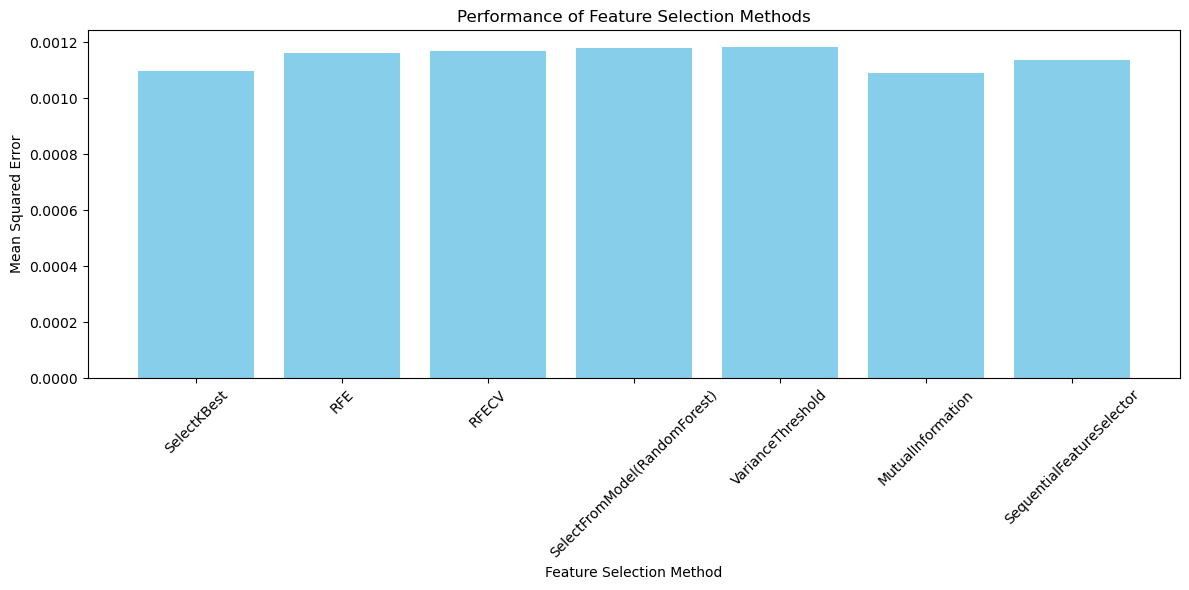

Best Feature Selection Method: MutualInformation
Selected Features by MutualInformation : Index(['host_acceptance_rate', 'accommodates', 'beds', 'number_of_reviews',
       'review_scores_rating', 'review_scores_communication',
       'review_scores_location', 'Entire home/apt', 'Private room',
       'bathrooms_num'],
      dtype='object')


In [22]:
plt.figure(figsize=(12, 6))
plt.bar(mse_scores.keys(), mse_scores.values(), color='skyblue')
plt.xlabel('Feature Selection Method')
plt.ylabel('Mean Squared Error')
plt.title('Performance of Feature Selection Methods')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

best_feature_selection = min(mse_scores, key=mse_scores.get)
print("Best Feature Selection Method:", best_feature_selection)

print("Selected Features by", best_feature_selection, ":", selected_features[best_feature_selection])

##### I change the data set based on the features that are selected by "MutualInformation" algorithm

In [23]:
col_list = list(selected_features[best_feature_selection])
col_list.append("price")
df_main = df_main[col_list]
df_main

,host_acceptance_rate,accommodates,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,Entire home/apt,Private room,Private room,bathrooms_num,price
0,0.83,0.200000,0.03125,0.014456,0.9275,0.9900,0.8925,1.0,0.0,0.0,0.181818,0.016016
1,0.60,0.133333,0.03125,0.001417,1.0000,1.0000,1.0000,1.0,0.0,0.0,0.272727,0.025526
2,0.73,0.200000,0.03125,0.003401,0.9800,0.9800,1.0000,1.0,0.0,0.0,0.272727,0.028629
3,0.10,0.066667,0.00000,0.000000,1.0000,1.0000,0.7500,1.0,0.0,0.0,0.272727,0.019019
4,0.90,0.066667,0.03125,0.002551,1.0000,1.0000,0.9725,1.0,0.0,0.0,0.272727,0.025025
...,...,...,...,...,...,...,...,...,...,...,...,...
5021,0.86,0.200000,0.03125,0.001984,1.0000,1.0000,1.0000,1.0,0.0,0.0,0.272727,0.049049
5022,0.81,0.200000,0.03125,0.001984,0.9700,1.0000,0.9700,1.0,0.0,0.0,0.272727,0.039039
5023,1.00,0.266667,0.03125,0.000567,1.0000,0.9175,0.8325,1.0,0.0,0.0,0.181818,0.026026
5024,0.82,0.066667,0.00000,0.001701,0.9650,1.0000,1.0000,1.0,0.0,0.0,0.181818,0.026527


# 3. Model Training and Evaluation

#### I train and evaluate multiple machine learning and deep learning models using different algorithms to predict the target variable "price" based on the features in the dataset. By running this code, I compare the performance of various machine learning and deep learning models and select the best-performing one for predicting the target variable 'price' based on the given features.

#### Mean Squared Error (MSE) is a common metric used to evaluate the performance of the model. It quantifies the average squared difference between the predicted values and the actual values in a dataset.

### 3.1 Machine Learning Models

##### importing the necessary library

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

##### I split the features (X) and target variable (y) from the main DataFrame. Then, I split the data into training, testing, and validation sets. Initially, I split it into training and a temporary set (X_temp, y_temp). Then, I further split the temporary set into validation and testing sets (X_val, y_val, X_test, y_test).

##### Next, I initialize various regression models stored in a dictionary called models. These models include Linear Regression, Ridge Regression, Lasso Regression, Elastic Net, Decision Tree, Random Forest, Gradient Boosting, AdaBoost, Support Vector Machine, and K-Nearest Neighbors.

##### This code efficiently prepares the data for training, testing, and validation and sets up a range of regression models for subsequent evaluation, laying the groundwork for comparative analysis of different algorithms to determine the most suitable model.

In [25]:
X = df_main.drop('price', axis=1) 
y = df_main['price']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(solver='saga'),
    "Lasso Regression": Lasso(),
    "Elastic Net": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "Support Vector Machine": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

##### Training and evaluating the models

In [26]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    results[name] = mse

##### I plot the MSE of different regression models using a bar plot. This visualization allows for a quick comparison of model performances. Then, I select the best model based on the lowest MSE on the validation set. Finally, I evaluate the best model's performance on the test set by calculating its MSE and print the result.

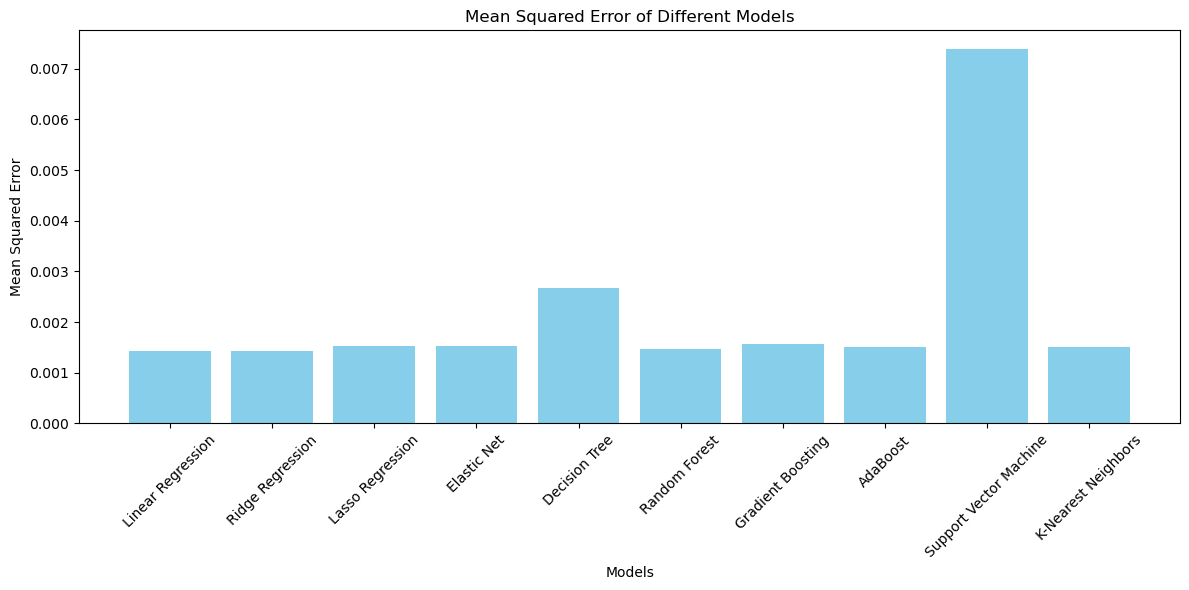

Test Mean Squared Error of the Best Model (Ridge Regression): 0.00016006157890654878


In [27]:
plt.figure(figsize=(12, 6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.title('Mean Squared Error of Different Models')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

best_model_name = min(results, key=results.get)
best_model = models[best_model_name]

y_pred_test = best_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print(f"Test Mean Squared Error of the Best Model ({best_model_name}): {mse_test}")

### 3.2 Deep Learning Models

##### importing the necessary library

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam, RMSprop, SGD
from keras.callbacks import EarlyStopping, LearningRateScheduler

##### In this code, I split the features (X) and target variable (y) from the main DataFrame and then further divide the data into training, testing, and validation sets. Additionally, I define a learning rate scheduler function named lr_schedule. This function adjusts the learning rate during training based on the epoch number, aiming to optimize the performance of the model.

In [29]:
X = df_main.drop('price', axis=1)  # Assuming 'house_price' is the target variable
y = df_main['price']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

def lr_schedule(epoch):
    lr = 0.001
    if epoch > 20:
        lr *= 0.5
    elif epoch > 40:
        lr *= 0.2
    return lr

##### I define various deep learning models using the Keras Sequential API. Each model is constructed within its corresponding function, specifying layers, activation functions, and optimizers. The models include Multilayer Perceptron (MLP), Deep Model, Wide & Deep Model, Simple RNN, and LSTM. This setup allows for easy experimentation and comparison of different neural network architectures to find the most suitable one for the task at hand.

In [30]:
def create_mlp_model(lr=0.001):
    model = Sequential()
    model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='linear'))
    optimizer = Adam(learning_rate=lr)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

def create_deep_model(lr=0.001):
    model = Sequential()
    model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='linear'))
    optimizer = RMSprop(learning_rate=lr)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

def create_wide_deep_model(lr=0.001):
    model = Sequential()
    model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='linear'))
    optimizer = SGD(learning_rate=lr, momentum=0.9)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

def create_simple_rnn_model(lr=0.001):
    model = Sequential()
    model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='linear'))
    optimizer = Adam(learning_rate=lr)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

def create_lstm_model(lr=0.001):
    model = Sequential()
    model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='linear'))
    optimizer = RMSprop(learning_rate=lr)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

deep_models = {
    "MLP": create_mlp_model,
    "Deep Model": create_deep_model,
    "Wide & Deep Model": create_wide_deep_model,
    "Simple RNN": create_simple_rnn_model,
    "LSTM": create_lstm_model
}

##### Training and evaluating the models

In [31]:
results_deep = {}
for name, create_model in deep_models.items():
    model = create_model()
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    lr_scheduler = LearningRateScheduler(lr_schedule)
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, callbacks=[early_stopping, lr_scheduler], verbose=0)
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    results_deep[name] = mse

24/24 [==============================] - 0s 2ms/step


##### I plot the mean squared errors (MSE) of different deep learning models using a bar plot for easy comparison. Afterward, I select the best-performing deep learning model based on the lowest MSE on the validation set. I then initialize the best model from the deep_models dictionary. Finally, I train the best model on the training data, predict on the test data, and calculate the MSE to assess its performance on unseen data. This approach efficiently evaluates and selects the best deep learning model while providing insights into its generalization ability on the test set.

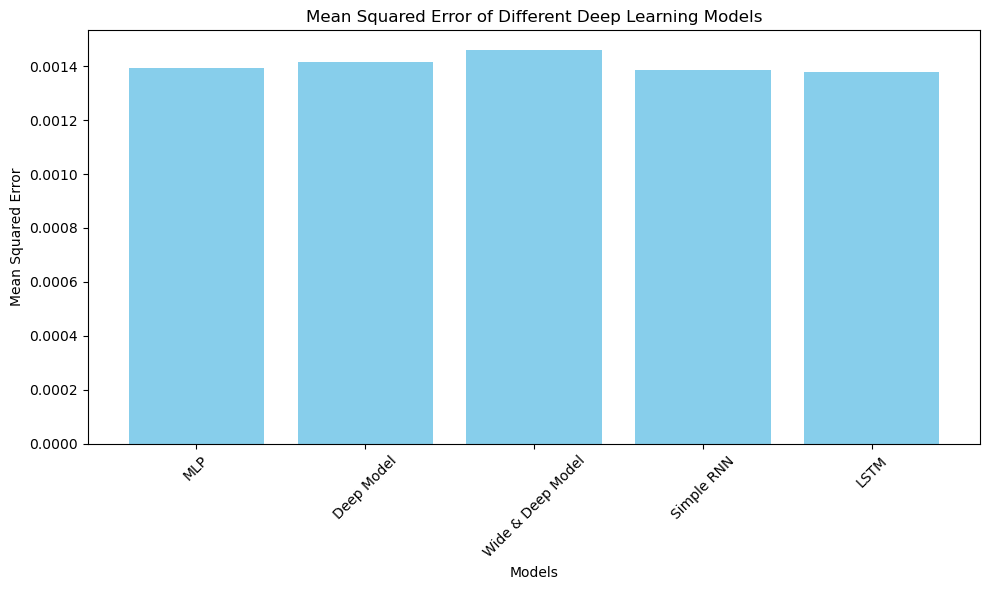

24/24 [==============================] - 0s 2ms/step
Test Mean Squared Error of the Best Deep Learning Model (LSTM): 0.000157184350437893


In [32]:
plt.figure(figsize=(10, 6))
plt.bar(results_deep.keys(), results_deep.values(), color='skyblue')
plt.title('Mean Squared Error of Different Deep Learning Models')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

best_deep_model_name = min(results_deep, key=results_deep.get)
best_deep_model = deep_models[best_deep_model_name]()

best_deep_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
y_pred_test_deep = best_deep_model.predict(X_test)
mse_test_deep = mean_squared_error(y_test, y_pred_test_deep)
print(f"Test Mean Squared Error of the Best Deep Learning Model ({best_deep_model_name}): {mse_test_deep}")